# Podcast Listening time prediction

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./data/train.csv", index_col= 0)
df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [6]:
df.shape

(750000, 11)

In [ ]:
#look for duplicated rows
df.duplicated().sum()

0

In [8]:
#Check null values
df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [10]:
df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


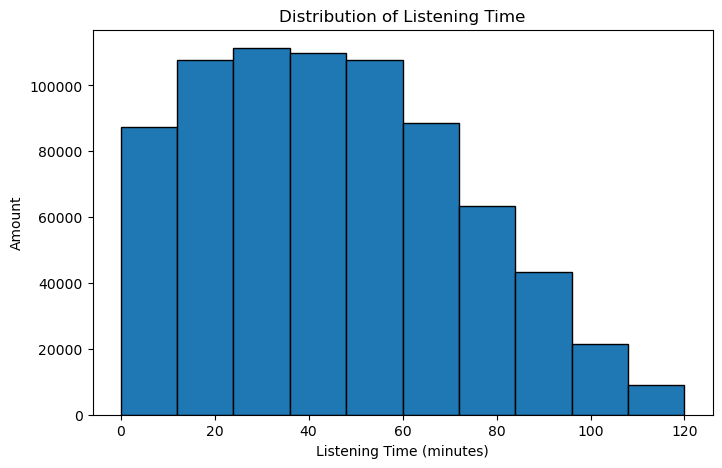

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df['Listening_Time_minutes'] ,edgecolor='black')
plt.title('Distribution of Listening Time')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Amount')
plt.show()

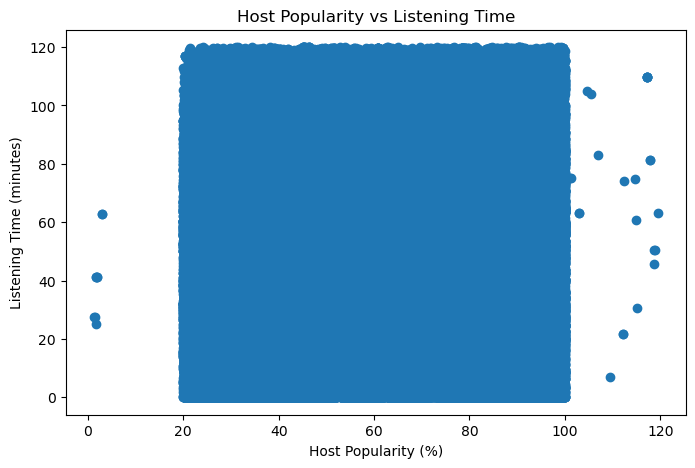

In [21]:

plt.figure(figsize=(8, 5))
plt.scatter(df['Host_Popularity_percentage'], df['Listening_Time_minutes'])
plt.title('Host Popularity vs Listening Time')
plt.xlabel('Host Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.show()


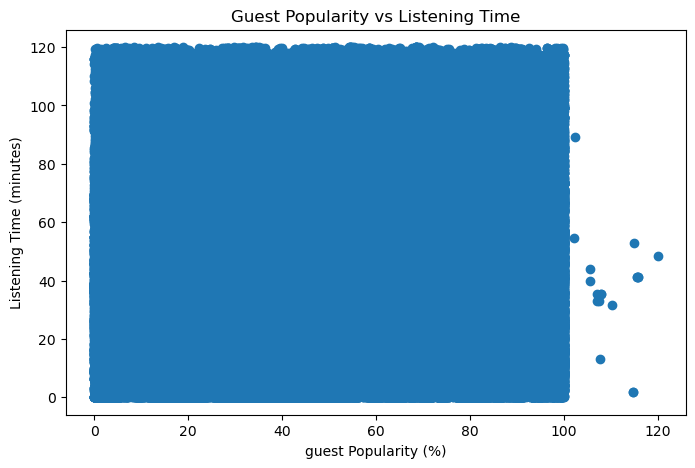

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Guest_Popularity_percentage'], df['Listening_Time_minutes'])
plt.title('Guest Popularity vs Listening Time')
plt.xlabel('guest Popularity (%)')
plt.ylabel('Listening Time (minutes)')
plt.show()

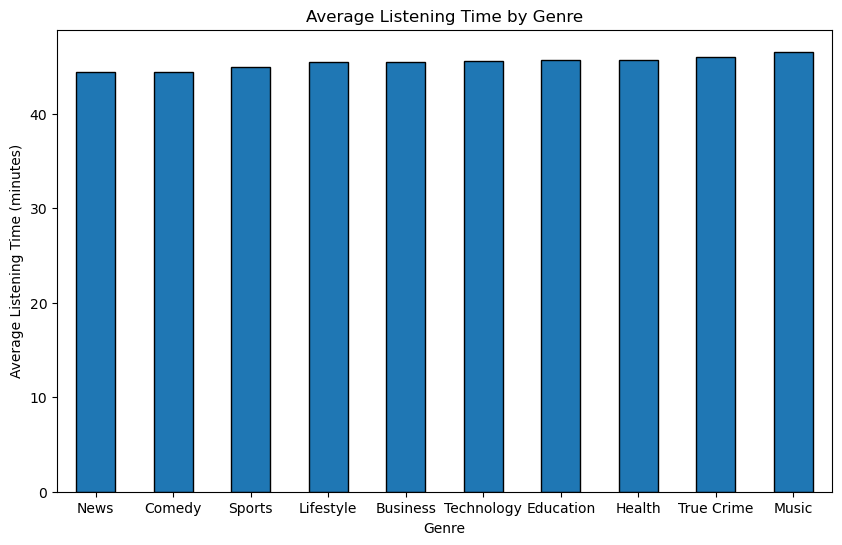

In [32]:
plt.figure(figsize=(10, 6))
genre_means = df.groupby('Genre')['Listening_Time_minutes'].mean()
genre_means.sort_values().plot(kind='bar', edgecolor='black')
plt.title('Average Listening Time by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Listening Time (minutes)')
plt.xticks(rotation=0)
plt.show()


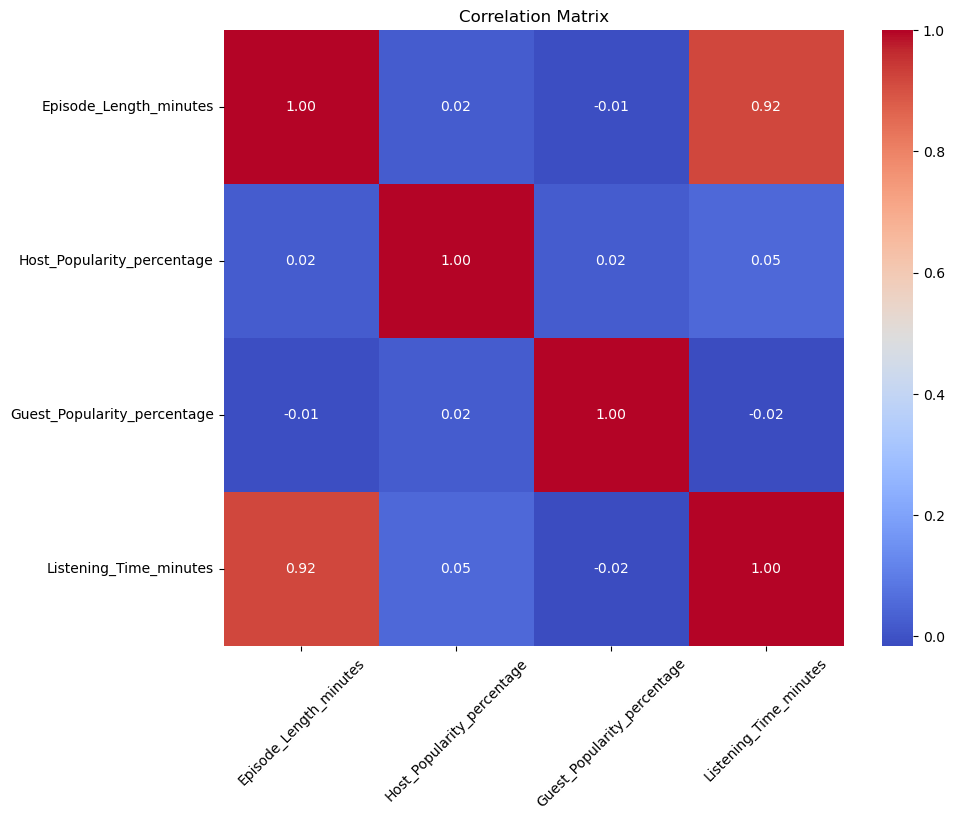

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Episode_Length_minutes', 'Host_Popularity_percentage', 
                         'Guest_Popularity_percentage', 'Listening_Time_minutes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()
